# Glossary
### 1. Import Libraries and Files
### 2. Assessing security implications
### 3. Customer Behavior in different geographic areas
### 4. Creating Exclusion Flag for Low-Activity Customers
### 5. Customer Profiling Section
### 6. Create distribution visualizations for all new variables
### 7. Aggregate max,mean,min for all variables based on expenditure and order frequency
### 8. Compare customer profiles with regions and departments
### 9. Exporting File

# 1. Import Libraries and Files

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#create path variable
path=r'C:\Users\Nuno\04-2024 Instacart Basket Analysis'
#import file
ords_prods_merge= pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','prod_ords_custs_merge.pkl'))

# 2. Assessing security implications

In [105]:
# remove limit of columns displayed
pd.options.display.max_columns = None
#Check columns
ords_prods_merge.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order_flag,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,type_of_spender,med_days_since_order,freq_of_customer,gender,state,age,date_joined,number_dependants,family_status,income,_merge,region,income_type,age_type,dependant_type,age_dependants_type
0,2,33120,1,1,202279,3,5,9,8.0,False,Organic Egg Whites,86,16,11.3,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,both,Mountain,Middle,Middle Aged,Has Dependants,Married Middle-Aged Parent
1,104690,33120,2,1,202279,8,6,10,30.0,False,Organic Egg Whites,86,16,11.3,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,both,Mountain,Middle,Middle Aged,Has Dependants,Married Middle-Aged Parent
2,132412,33120,1,1,202279,6,5,9,30.0,False,Organic Egg Whites,86,16,11.3,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,both,Mountain,Middle,Middle Aged,Has Dependants,Married Middle-Aged Parent
3,2808715,33120,1,1,202279,5,5,13,9.0,False,Organic Egg Whites,86,16,11.3,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,both,Mountain,Middle,Middle Aged,Has Dependants,Married Middle-Aged Parent
4,2894949,33120,5,0,202279,1,5,9,NaN,True,Organic Egg Whites,86,16,11.3,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,both,Mountain,Middle,Middle Aged,Has Dependants,Married Middle-Aged Parent


As seen in the previous table, we have columns that refer to client first and surnames, as well as gender, state, age, family status and number of dependants. Put together, these columns are personally identifiable information (PII). In order to protect the client, we should remove the most personal information that is the least crucial to our analysis. In this case, it is the client name collumns.

In [4]:
# dropping name information columns
ords_prods_merge.drop(columns=['first_name','surname'], inplace= True)

In [5]:
#check for dropped columns
ords_prods_merge.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order_flag,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,type_of_spender,med_days_since_order,freq_of_customer,gender,state,age,date_joined,number_dependants,family_status,income,_merge
0,2,33120,1,1,202279,3,5,9,8.0,False,Organic Egg Whites,86,16,11.3,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,both
1,104690,33120,2,1,202279,8,6,10,30.0,False,Organic Egg Whites,86,16,11.3,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,both
2,132412,33120,1,1,202279,6,5,9,30.0,False,Organic Egg Whites,86,16,11.3,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,both
3,2808715,33120,1,1,202279,5,5,13,9.0,False,Organic Egg Whites,86,16,11.3,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,both
4,2894949,33120,5,0,202279,1,5,9,NaN,True,Organic Egg Whites,86,16,11.3,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,both


# 3. Customer Behavior in different geographic areas

In [34]:
#Creating region column and grouping states into Northeast region
ords_prods_merge.loc[ords_prods_merge['state'].isin(['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania',
'New Jersey']),'region'] = 'Northeast'

In [35]:
#Creating region column and grouping states into Midwest region
ords_prods_merge.loc[ords_prods_merge['state'].isin(['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska',
'Kansas','Minnesota','Iowa','Missouri']),'region'] = 'Midwest'

In [36]:
#Creating region column and grouping states into South region
ords_prods_merge.loc[ords_prods_merge['state'].isin(['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia',
'Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']),'region'] = 'South'

In [37]:
#Creating region column and grouping states into Mountain region
ords_prods_merge.loc[ords_prods_merge['state'].isin(['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico',
'Alaska','Washington','Oregon','California','Hawaii']),'region'] = 'Mountain'

In [30]:
#Checking if all columns have been attributed a value
ords_prods_merge['region'].value_counts(dropna= False)

region
South        10791885
Mountain      8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [4]:
# Determining wether there's a difference in spending habits between different loyalties
# Creating df with the average spend per item per user grouped by frequency
frequency_spending = ords_prods_merge.groupby(['freq_of_customer'])['spending_flag'].mean()
#reseting index to have both columns separate in my dataframe
frequency_spending.reset_index()
#dropping 5 NaNs for visualization
frequency_spending.drop(index='nan',inplace=True)

Text(0, 0.5, 'Avg Spend per Item')

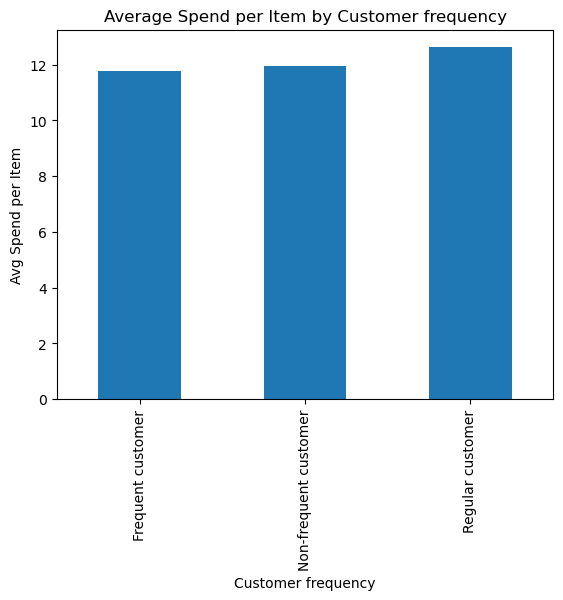

In [5]:
#plotting avg.spend per user, by frequency
bar_frequency_spending = frequency_spending.plot.bar()
plt.title('Average Spend per Item by Customer frequency')
plt.xlabel('Customer frequency')
plt.ylabel('Avg Spend per Item')

In [101]:
#Determining wether there's a difference in spending habits between different regions
#Creating df with the average spend per user grouped by region
regional_spending = ords_prods_merge.groupby(['region'])['spending_flag'].mean()

In [102]:
#reseting index to have both columns separate in my dataframe
regional_spending.reset_index()

,region,spending_flag
0,Midwest,12.715483
1,Mountain,11.319834
2,Northeast,11.554997
3,South,12.195577


Text(0.5, 0, 'Region')

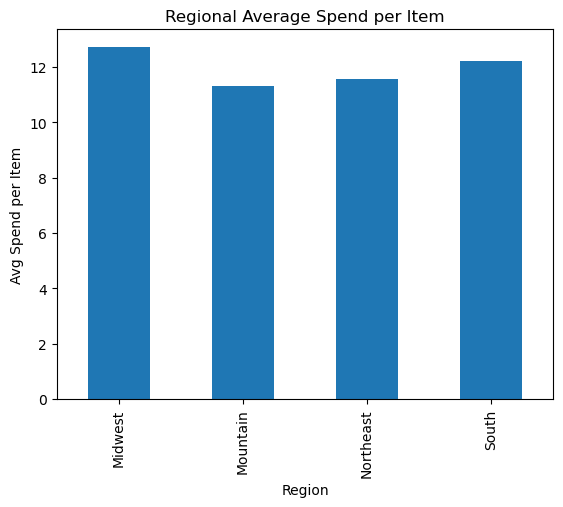

In [104]:
#plotting avg.spend per user, by region, and saving it to variable
bar_regional_spending= regional_spending.plot.bar(ylabel='avg.spend')
plt.title('Regional Average Spend per Item')
plt.ylabel('Avg Spend per Item')
plt.xlabel('Region')

In [41]:
#saving the figure
bar_regional_spending.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_regional_spending.png'))

# 4. Creating Exclusion Flag for Low-Activity Customers

In [39]:
#creating exclusion flag collumn
ords_prods_merge.loc[ords_prods_merge['max_order']>=5, 'exclusion_flag'] = 'Not Excluded'
ords_prods_merge.loc[ords_prods_merge['max_order']<5, 'exclusion_flag'] = 'Excluded'

In [9]:
ords_prods_merge['exclusion_flag'].value_counts()

exclusion_flag
Not Excluded    30964564
Excluded         1440295
Name: count, dtype: int64

In [10]:
#based on exclusion flag, create dataframe with the excluded data
ords_prods_excluded = ords_prods_merge[ords_prods_merge['exclusion_flag']=='Excluded']

In [40]:
#based on exclusion flag, create dataframe only with the non-excluded data
ords_prods_not_excluded =  ords_prods_merge[ords_prods_merge['exclusion_flag']=='Not Excluded']

In [14]:
#checking if the lenght of the sum of both separate datasets is equal to the original size
len(ords_prods_excluded) + len (ords_prods_not_excluded) == len(ords_prods_merge)

True

In [120]:
ords_prods_not_excluded.to_pickle(os.path.join(path,'02 Data','Prepared Data','4_10_orders_products_not_excluded'))

# 5. Customer Profiling Section

In [41]:
#Create Income categories: Low, Middle, High
ords_prods_not_excluded.loc[ords_prods_not_excluded['income'] < 50000,'income_type'] = 'Low'
ords_prods_not_excluded.loc[(ords_prods_not_excluded['income'] >= 50000) & (ords_prods_not_excluded['income']< 100000),'income_type'] = 'Middle'
ords_prods_not_excluded.loc[ords_prods_not_excluded['income']>= 100000,'income_type'] = 'High'

C:\Users\Nuno\AppData\Local\Temp\ipykernel_21668\918356217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_not_excluded.loc[ords_prods_not_excluded['income'] < 50000,'income_type'] = 'Low'


In [19]:
#Check value counts for problematic values
income_vcs = ords_prods_not_excluded['income_type'].value_counts(dropna=False)
income_vcs

income_type
High      14207402
Middle    13394608
Low        3362554
Name: count, dtype: int64

In [42]:
#Create Age categories: Young Adult, Middle Aged, Senior
ords_prods_not_excluded.loc[ords_prods_not_excluded['age']< 40,'age_type'] = 'Young Adult'
ords_prods_not_excluded.loc[(ords_prods_not_excluded['age'] >= 40) & (ords_prods_not_excluded['age']< 65),'age_type'] = 'Middle Aged'
ords_prods_not_excluded.loc[ords_prods_not_excluded['age']>= 65,'age_type'] = 'Senior'

C:\Users\Nuno\AppData\Local\Temp\ipykernel_21668\3580732598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_not_excluded.loc[ords_prods_not_excluded['age']< 40,'age_type'] = 'Young Adult'


In [27]:
#Check value counts for problematic values
age_vcs= ords_prods_not_excluded['age_type'].value_counts(dropna=False)
age_vcs

age_type
Middle Aged    12103910
Young Adult    10665110
Senior          8195544
Name: count, dtype: int64

In [43]:
#Create n_dependants categories:
ords_prods_not_excluded['dependant_type'] = 'No Dependants'
ords_prods_not_excluded.loc[ords_prods_not_excluded['number_dependants']> 0,'dependant_type'] = 'Has Dependants'

C:\Users\Nuno\AppData\Local\Temp\ipykernel_21668\2596875876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_not_excluded['dependant_type'] = 'No Dependants'


In [29]:
#Check value counts for problematic values
dependant_vcs = ords_prods_not_excluded['dependant_type'].value_counts(dropna=False)
dependant_vcs

dependant_type
Has Dependants    23224883
No Dependants      7739681
Name: count, dtype: int64

In [44]:
#Create category mixing age, family status, and dependant types:
#Young classifications: Single Young Parent, Married Young Parent, Single Young Adult, Married Young Adult
ords_prods_not_excluded.loc[(ords_prods_not_excluded['dependant_type'] == 'No Dependants') & (ords_prods_not_excluded['age_type'] =='Young Adult') & (ords_prods_not_excluded['family_status'].isin(['single','divorced/widowed','living with parents and siblings'])),'age_dependants_type'] ='Single Young Adult'
ords_prods_not_excluded.loc[(ords_prods_not_excluded['dependant_type'] == 'No Dependants') & (ords_prods_not_excluded['age_type'] =='Young Adult') & (ords_prods_not_excluded['family_status'] == 'married'),'age_dependants_type'] = 'Married Young Adult'
ords_prods_not_excluded.loc[(ords_prods_not_excluded['dependant_type'] == 'Has Dependants') & (ords_prods_not_excluded['age_type'] =='Young Adult') & (ords_prods_not_excluded['family_status'] == 'married'),'age_dependants_type'] = 'Married Young Parent'
ords_prods_not_excluded.loc[(ords_prods_not_excluded['dependant_type'] == 'Has Dependants') & (ords_prods_not_excluded['age_type'] =='Young Adult') & (ords_prods_not_excluded['family_status'].isin(['single','divorced/widowed','living with parents and siblings'])),'age_dependants_type'] = 'Single Young Parent'

C:\Users\Nuno\AppData\Local\Temp\ipykernel_21668\2002626514.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_not_excluded.loc[(ords_prods_not_excluded['dependant_type'] == 'No Dependants') & (ords_prods_not_excluded['age_type'] =='Young Adult') & (ords_prods_not_excluded['family_status'].isin(['single','divorced/widowed','living with parents and siblings'])),'age_dependants_type'] ='Single Young Adult'


In [45]:
#Middle-Aged classifications: Single Middle-Aged Parent, Married Middle-Aged Parent, Single Middle Aged Adult, Married Middle-Aged Adult
ords_prods_not_excluded.loc[(ords_prods_not_excluded['dependant_type'] == 'No Dependants') & (ords_prods_not_excluded['age_type'] =='Middle Aged') & (ords_prods_not_excluded['family_status'].isin(['single','divorced/widowed','living with parents and siblings'])),'age_dependants_type'] = 'Single Middle-Aged Adult'
ords_prods_not_excluded.loc[(ords_prods_not_excluded['dependant_type'] == 'No Dependants') & (ords_prods_not_excluded['age_type'] =='Middle Aged') & (ords_prods_not_excluded['family_status'] == 'married'),'age_dependants_type'] = 'Married Middle-Aged Adult'
ords_prods_not_excluded.loc[(ords_prods_not_excluded['dependant_type'] == 'Has Dependants') & (ords_prods_not_excluded['age_type'] =='Middle Aged') & (ords_prods_not_excluded['family_status'] == 'married'),'age_dependants_type'] = 'Married Middle-Aged Parent'
ords_prods_not_excluded.loc[(ords_prods_not_excluded['dependant_type'] == 'Has Dependants') & (ords_prods_not_excluded['age_type'] =='Middle Aged') & (ords_prods_not_excluded['family_status'].isin(['single','divorced/widowed','living with parents and siblings'])),'age_dependants_type'] = 'Single Middle-Aged Parent'

In [46]:
#Middle-Aged classifications: Single Senior Parent, Married Senior Parent, Single Senior Adult, Married Senior Adult
ords_prods_not_excluded.loc[(ords_prods_not_excluded['dependant_type'] == 'No Dependants') & (ords_prods_not_excluded['age_type'] =='Senior') & (ords_prods_not_excluded['family_status'].isin(['single','divorced/widowed','living with parents and siblings'])),'age_dependants_type'] = 'Single Senior Adult'
ords_prods_not_excluded.loc[(ords_prods_not_excluded['dependant_type'] == 'No Dependants') & (ords_prods_not_excluded['age_type'] =='Senior') & (ords_prods_not_excluded['family_status'] == 'married'),'age_dependants_type'] = 'Married Senior Adult'
ords_prods_not_excluded.loc[(ords_prods_not_excluded['dependant_type'] == 'Has Dependants') & (ords_prods_not_excluded['age_type'] =='Senior') & (ords_prods_not_excluded['family_status'] == 'married'),'age_dependants_type'] = 'Married Senior Parent'
ords_prods_not_excluded.loc[(ords_prods_not_excluded['dependant_type'] == 'Has Dependants') & (ords_prods_not_excluded['age_type'] =='Senior') & (ords_prods_not_excluded['family_status'].isin(['single','divorced/widowed','living with parents and siblings'])),'age_dependants_type'] = 'Single Senior Parent'

In [33]:
#Check value counts for problematic values
age_dependant_vcs = ords_prods_not_excluded['age_dependants_type'].value_counts(dropna=False)
age_dependant_vcs

age_dependants_type
Married Middle-Aged Parent    9046762
Married Young Parent          6523363
Married Senior Parent         6173586
Single Middle-Aged Adult      3057148
Single Young Adult            2660575
Single Senior Adult           2021958
Single Young Parent           1481172
Name: count, dtype: int64

# 6. Create distribution visualizations for all new variables

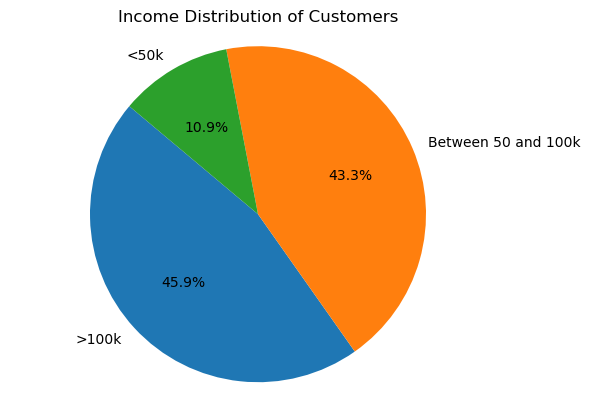

In [34]:
# Plot a pie chart for income distribution
plt.pie(income_vcs, labels=['>100k','Between 50 and 100k','<50k'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add title to pie chart
plt.title('Income Distribution of Customers')
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','exclusion','income_dstrb_customers.png'))

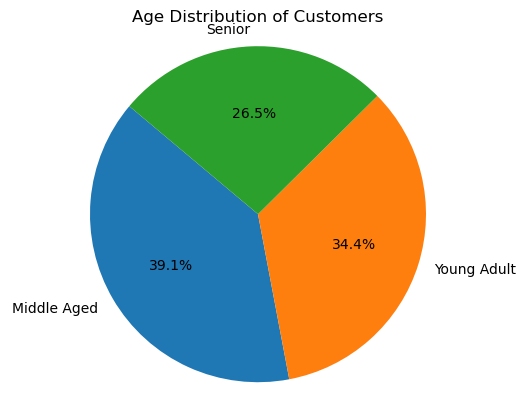

In [35]:
# Plot a pie chart for Age distribution
plt.pie(age_vcs, labels=age_vcs.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add title to pie chart
plt.title('Age Distribution of Customers')
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','exclusion','age_dstrb_customers.png'))

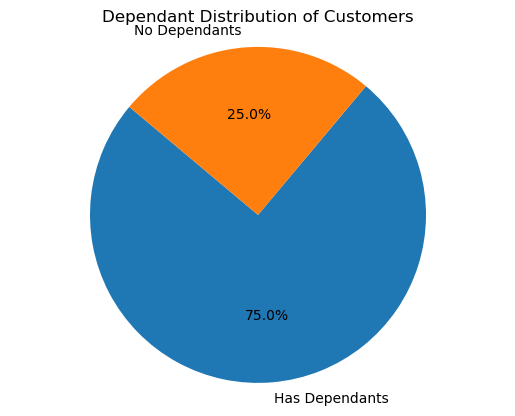

In [36]:
# Plot a pie chart for dependant distribution
plt.pie(dependant_vcs,labels=dependant_vcs.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add title to pie chart
plt.title('Dependant Distribution of Customers')
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','exclusion','dependant_dstrb_customers.png'))

In [37]:
#calculate percentage values for age/dependant value counts
percentages_age_dependant_vcs = (age_dependant_vcs/sum(age_dependant_vcs))*100
percentages_age_dependant_vcs

age_dependants_type
Married Middle-Aged Parent    29.216501
Married Young Parent          21.067188
Married Senior Parent         19.937584
Single Middle-Aged Adult       9.873054
Single Young Adult             8.592322
Single Senior Adult            6.529909
Single Young Parent            4.783442
Name: count, dtype: float64

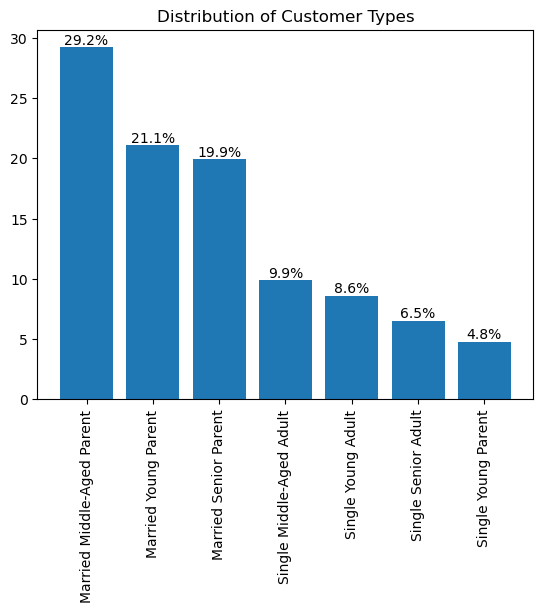

In [38]:
# Create the bar chart elements
fig,ax= plt.subplots()
bars= plt.bar(height=percentages_age_dependant_vcs,x=percentages_age_dependant_vcs.index)
#Change to display the percentage
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height,
            '{:.1f}%'.format(height),
            ha='center', va='bottom')
#change title
plt.title('Distribution of Customer Types')
#rotate labels to prevent overlap
plt.xticks(rotation=90)
#Export chart
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','exclusion','parent_age_dstrb_customers.png'))

In [14]:
# creating dataset for distribution of Customer frequency
freq_of_customer_vcs = ords_prods_not_excluded['freq_of_customer'].value_counts()

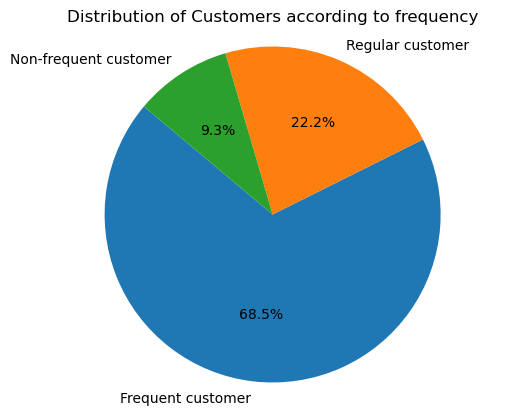

In [15]:
# Plot a pie chart for dependant distribution
plt.pie(freq_of_customer_vcs,labels=freq_of_customer_vcs.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add title to pie chart
plt.title('Distribution of Customers according to frequency')
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','exclusion','frequency_dstrb_customers.png'))

Text(0.5, 1.0, 'Distribution of customers by loyalty')

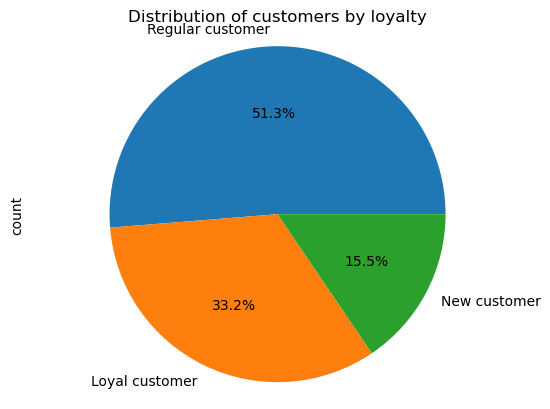

In [53]:
# Plot a pie chart for distribution of customers by loyalty
ords_prods_not_excluded['loyalty_flag'].value_counts().plot.pie(labels=ords_prods_not_excluded['loyalty_flag'].value_counts().index,autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add title to pie chart
plt.title('Distribution of customers by loyalty')
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','exclusion','loyalty_dstrb_customers.png'))

# 7. Aggregate max,mean,min for all variables based on expenditure and order frequency

In [48]:
ords_prods_not_excluded['total_expenditure']= ords_prods_not_excluded.groupby('user_id')['prices'].transform(np.sum)

C:\Users\Nuno\AppData\Local\Temp\ipykernel_21668\1818590835.py:1: FutureWarning: The provided callable <function sum at 0x0000026EF4BF3560> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ords_prods_not_excluded['total_expenditure']= ords_prods_not_excluded.groupby('user_id')['prices'].transform(np.sum)
C:\Users\Nuno\AppData\Local\Temp\ipykernel_21668\1818590835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_not_excluded['total_expenditure']= ords_prods_not_excluded.groupby('user_id')['prices'].transform(np.sum)


total_expenditure
26394.9    3704
9512.1     3670
9273.1     3666
24307.1    3637
6353.8     3197
           ... 
60.7          5
16.7          5
23.0          5
16.4          5
11.5          5
Name: count, Length: 46433, dtype: int64

In [15]:
ords_prods_not_excluded.groupby('loyalty_flag').agg({'total_expenditure': ['mean', 'min', 'max'], 'order_number': ['mean', 'min', 'max']})

total_expenditure                 order_number        
                              mean    min      max         mean min max
loyalty_flag                                                           
Loyal customer         6153.840807  156.0  26394.9    32.641196   1  99
New customer            785.446264    5.0   3920.4     4.268295   1  10
Regular customer       2443.027952   15.7  12186.6    12.347452   1  40

In [23]:
#Aggregate max,mean,min for expediture and order frequency grouped by income_type
ords_prods_not_excluded.groupby('income_type').agg({'total_expenditure': ['mean', 'min', 'max'], 'order_number': ['mean', 'min', 'max']})

total_expenditure                order_number        
                         mean   min      max         mean min max
income_type                                                      
High              3524.700344  24.7  26394.9    17.918880   1  99
Low               2525.917679   5.0  24307.1    16.835516   1  99
Middle            3529.536191  11.2  22696.9    17.994953   1  99

In [ ]:
#Aggregate max,mean,min for expediture and order frequency grouped by region
ords_prods_not_excluded.groupby('income_type').agg({'total_expenditure': ['mean', 'min', 'max'], 'order_number': ['mean', 'min', 'max']})

In [50]:
#Aggregate max,mean,min for expediture and order frequency grouped by age_type
ords_prods_not_excluded.groupby('region').agg({'total_expenditure': ['mean', 'min', 'max'], 'order_number': ['mean', 'min', 'max']})

total_expenditure               order_number        
                       mean  min      max         mean min max
region                                                        
Midwest         3358.504028  7.0  26394.9    17.602828   1  99
Mountain        3450.734085  5.0  18910.0    17.971929   1  99
Northeast       3438.609495  7.7  22777.9    17.921760   1  99
South           3424.804206  6.8  24307.1    17.844674   1  99

In [25]:
#Aggregate max,mean,min for expediture and order frequency grouped by dependant_type
ords_prods_not_excluded.groupby('dependant_type').agg({'total_expenditure': ['mean', 'min', 'max'], 'order_number': ['mean', 'min', 'max']})

total_expenditure               order_number        
                            mean  min      max         mean min max
dependant_type                                                     
Has Dependants       3415.083731  6.8  26394.9    17.792891   1  99
No Dependants        3428.074479  5.0  24307.1    17.957922   1  99

In [26]:
#Aggregate max,mean,min for expediture and order frequency grouped by age_dependant_type
ords_prods_not_excluded.groupby('age_dependants_type').agg({'total_expenditure': ['mean', 'min', 'max'], 'order_number': ['mean', 'min', 'max']})

total_expenditure                order_number      \
                                        mean   min      max         mean min   
age_dependants_type                                                            
Married Middle-Aged Parent       3377.523863  10.4  21509.2    17.713429   1   
Married Senior Parent            3398.255000   6.8  26394.9    17.768287   1   
Married Young Parent             3472.987123   7.0  22696.9    17.879191   1   
Single Middle-Aged Adult         3511.080511   5.0  24307.1    18.208417   1   
Single Senior Adult              3366.567973  15.7  17519.6    17.835837   1   
Single Young Adult               3379.439070  10.5  18883.2    17.762870   1   
Single Young Parent              3459.618715  14.4  16048.1    18.000712   1   

                                
                           max  
age_dependants_type             
Married Middle-Aged Parent  99  
Married Senior Parent       99  
Married Young Parent        99  
Single Middle-Aged Adult    99  
Single Senior Adult         99  
Single Young Adult          99  
Single Young Parent         99

In [ ]:
#Aggregate max,mean,min for expediture and order frequency grouped by age_dependant_type
ords_prods_not_excluded.groupby('loyalty_flag').agg({'prices': ['mean', 'min', 'max'], 'order_number': ['mean', 'min', 'max']})

# 8. Compare customer profiles with regions and departments

### Region comparison

C:\Users\Nuno\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


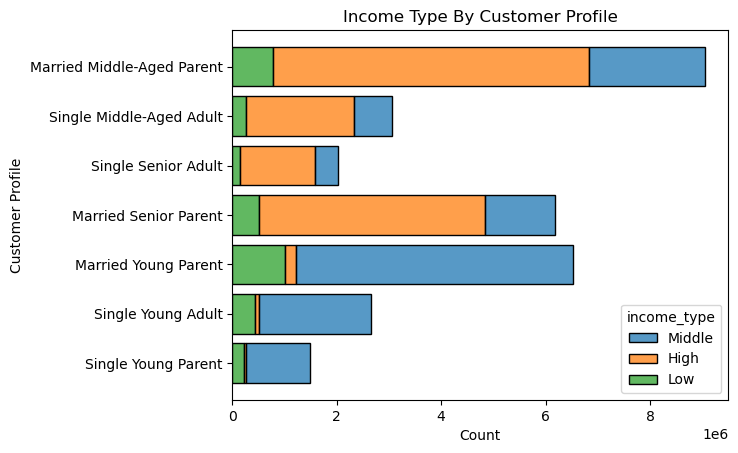

In [46]:
# Plotting stacked histplot of income type by Customer Profile
sns.histplot(data=ords_prods_not_excluded,y='age_dependants_type',hue='income_type',multiple='stack', shrink=.8)
plt.title('Income Type By Customer Profile') # Set title
plt.ylabel('Customer Profile')  # Set x-axis label
plt.xlabel('Count')   # Set y-axis label
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','exclusion','Income_type_by_customer_profile_bar.png'))

In [16]:
# Prepping dataset for Plotting stacked histplot of income type by Customer frequency
data_for_histplot_cust_freq = ords_prods_not_excluded[['freq_of_customer','income_type']]

C:\Users\Nuno\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


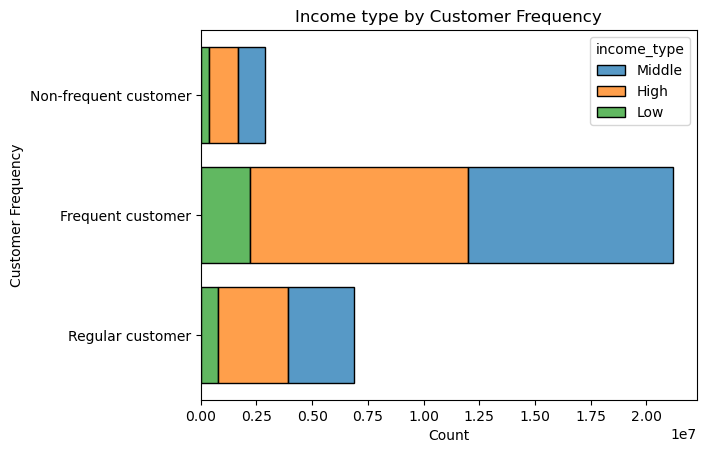

In [17]:
#Plotting stacked histplot of income type by Customer frequency
sns.histplot(data=data_for_histplot_cust_freq,y='freq_of_customer',hue='income_type',multiple='stack',shrink=.8,pthresh=6)
plt.title('Income type by Customer Frequency') # Set title
plt.ylabel('Customer Frequency')  # Set x-axis label
plt.xlabel('Count')   # Set y-axis label
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','exclusion','Income_type_by_customer_frequency_bar.png'))

C:\Users\Nuno\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


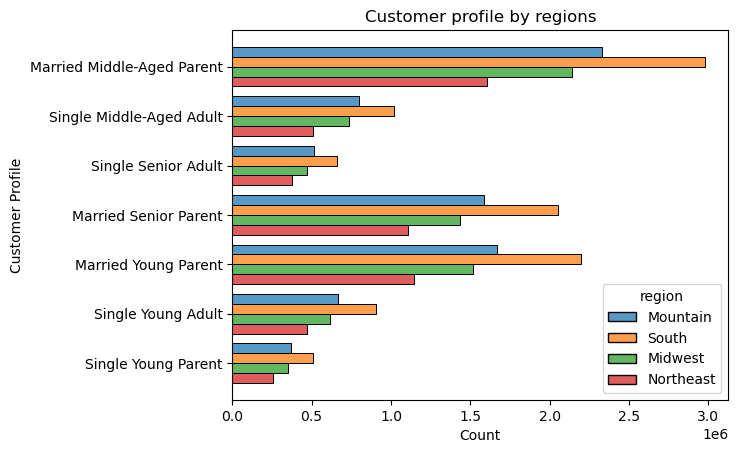

In [49]:
#Plotting dodged histplot of Customer type by regions
sns.histplot(data=ords_prods_not_excluded,y='age_dependants_type',hue='region',multiple='dodge',shrink=.8)
plt.title('Customer profile by regions') # set title
plt.ylabel('Customer Profile')  # Set x-axis label
plt.xlabel('Count')   # Set y-axis label
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','exclusion','Customer_profile_by_region_bar.png'))

### Department comparison

In [50]:
#Creating crosstab to generate heatmap of Department Sales by Customer Profile
dstrb_cust_departments = pd.crosstab(ords_prods_not_excluded['age_dependants_type'],ords_prods_not_excluded['department_id'])

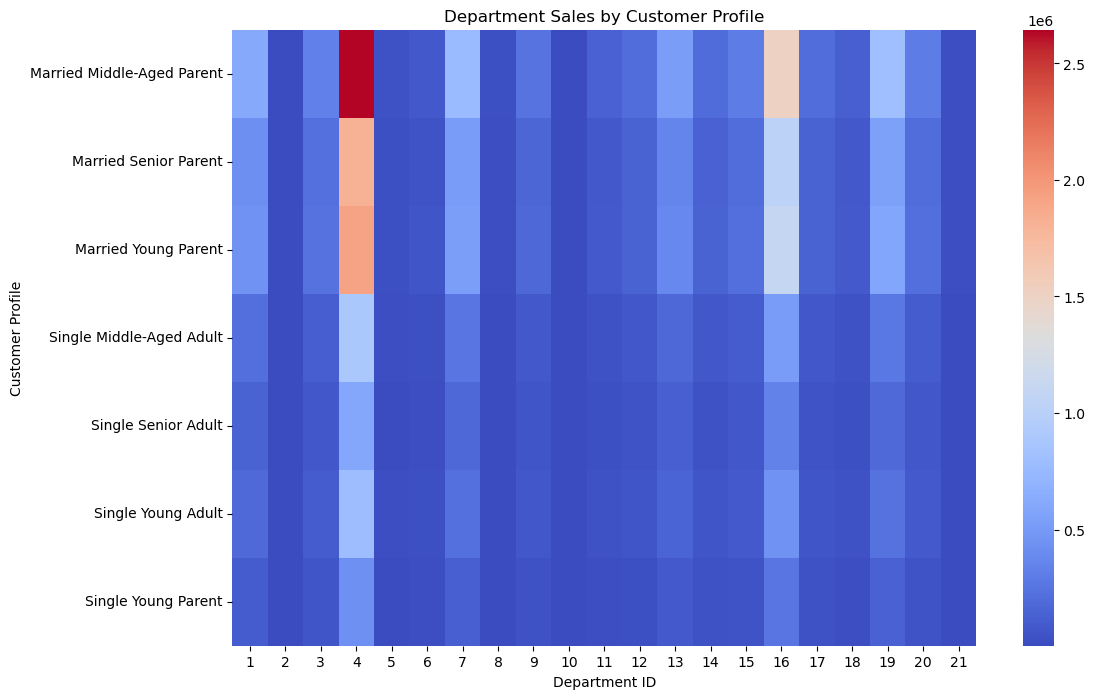

In [51]:
# heatmap of Department Sales by Customer Profile
plt.figure(figsize=(12, 8)) #set figure size
sns.heatmap(dstrb_cust_departments, cmap='coolwarm',fmt='d')
plt.title('Department Sales by Customer Profile') # set title
plt.ylabel('Customer Profile')  # Set x-axis label
plt.xlabel('Department ID')   # Set y-axis label
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','exclusion','department_sales_by_cust_profile_heat.png'))

In [52]:
#Creating crosstab to generate heatmap of Department Sales by region
dstrb_department_regions = pd.crosstab(ords_prods_not_excluded['region'],ords_prods_not_excluded['department_id'])

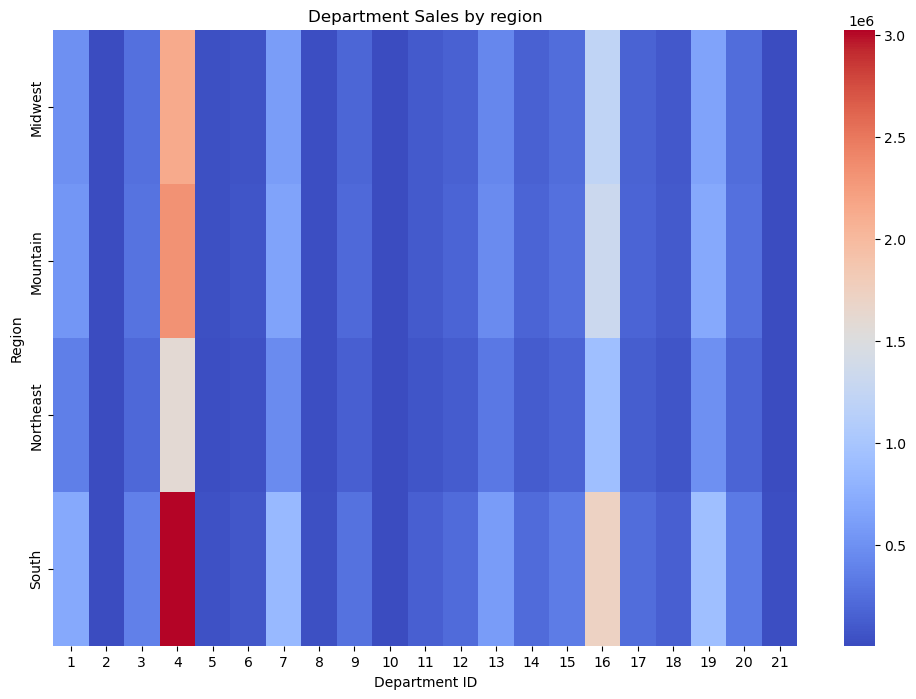

In [54]:
# Generate heatmap of Department Sales by region
plt.figure(figsize=(12, 8)) # set figure size
sns.heatmap(dstrb_department_regions, cmap='coolwarm',fmt='d')
plt.title('Department Sales by region') # set title
plt.ylabel('Region')  # Set x-axis label
plt.xlabel('Department ID')   # Set y-axis label
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','exclusion','Department_Sales_by_region_heat.png'))

In [19]:
#Creating crosstab to generate heatmap of Department Sales by Customer frequency
dstrb_frequency_departments = pd.crosstab(ords_prods_not_excluded['freq_of_customer'],ords_prods_not_excluded['department_id'])

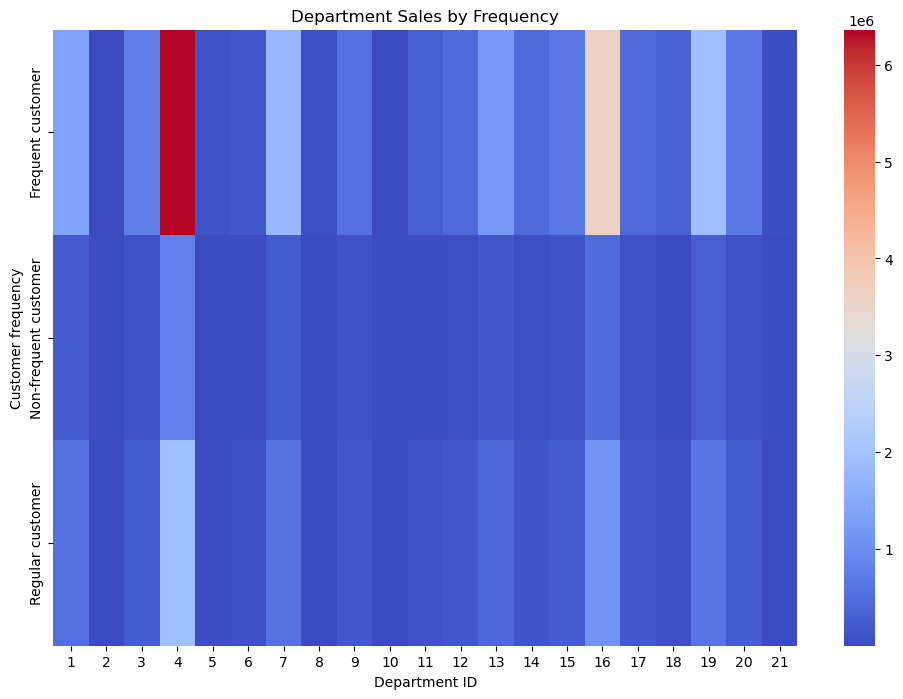

In [21]:
# Generate heatmap of Department Sales by Customer frequency
plt.figure(figsize=(12, 8)) #set figure size
sns.heatmap(dstrb_frequency_departments,cmap='coolwarm',fmt='d')
plt.title('Department Sales by Frequency') # set title
plt.ylabel('Customer frequency')  # Set x-axis label
plt.xlabel('Department ID')   # Set y-axis label
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','exclusion','Department_Sales_by_frequency_heat.png'))

In [8]:
#Creating crosstab to generate heatmap of Department Sales by Customer Loyalty
dstrb_loyalty_departments = pd.crosstab(ords_prods_not_excluded['loyalty_flag'],ords_prods_not_excluded['department_id'])

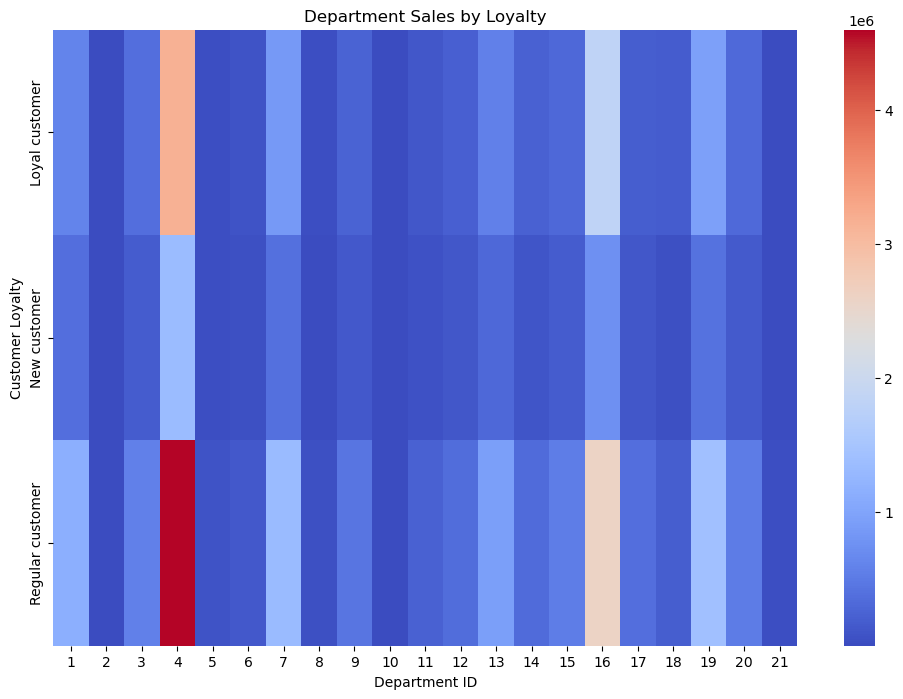

In [9]:
# Generate heatmap of Department Sales by Customer loyalty
plt.figure(figsize=(12, 8)) #set figure size
sns.heatmap(dstrb_loyalty_departments,cmap='coolwarm',fmt='d')
plt.title('Department Sales by Loyalty') # set title
plt.ylabel('Customer Loyalty')  # Set x-axis label
plt.xlabel('Department ID')   # Set y-axis label
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','exclusion','Department_Sales_by_loyalty_heat.png'))

In [49]:
#Preparing Data dict for Department identification
df_dep = pd.read_csv(os.path.join(path,'02 Data','Original Data','4.4_departments','departments.csv'),index_col=False)
df_dep_t=df_dep.T
df_dep_t.reset_index()
new_header = df_dep_t.iloc[0]
df_dep_t = df_dep_t[1:]
df_dep_t.columns = new_header
df_dep_t

department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


# 9. Exporting File

In [61]:
ords_prods_not_excluded.to_pickle(os.path.join(path,'02 Data','Prepared Data','exclusion','4_10_final_data'))